In [2]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import pandas as pd
import os

# import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 10

from Funciones import *

In [3]:
ruta_base  = os.path.dirname(os.path.abspath('./')) + '/'
ruta_datos = ruta_base + 'Datos/'
ruta_shp   = ruta_datos+ 'Shapefiles/'
ruta_imagenes = ruta_base + 'Imagenes/'

In [4]:
# Carga información
datos_pcs = pd.read_csv(ruta_datos+'Datos_PCS.csv', index_col=0, parse_dates=True)

In [5]:
# pcs utilizadas
pcs_util =  ['PC1', 'PC2', 'PC18', 'PC9', 'PC6', 'PC16', 'PC7', 'PC8', 'Caudal']

datos_pcs = datos_pcs[pcs_util]

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

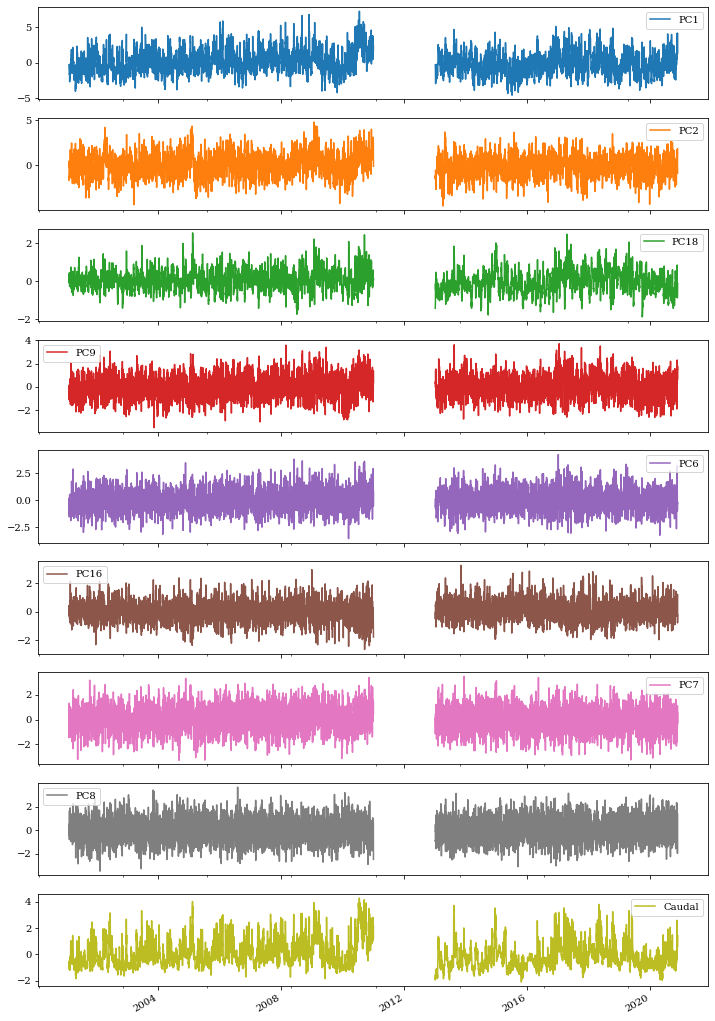

In [6]:
pcs_y_gra = datos_pcs.copy()
pcs_y_gra.loc['2013-01-01',:] = np.nan
pcs_y_gra.index = pd.DatetimeIndex(pcs_y_gra.index)
pcs_y_gra.plot(subplots=True, figsize=(12,20))
# plt.savefig(ruta_imagenes+'Series_PCs_clasif_max.png', bbox_inches='tight', dpi=150)

### Datos de calibración y validación

In [7]:
X = datos_pcs.drop(['Caudal'],axis=1)
y = datos_pcs['Caudal']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=False)
kfold = KFold(n_splits=5, shuffle= False)

## Regresión lineal

In [65]:
lr = LinearRegression()

[0.63578817 0.57405703 0.60109637 0.7738736  0.7819725 ]
[0.79736326 0.75766551 0.77530405 0.87970086 0.88429209]
0.6733575321085026


(0.0, 1.0)

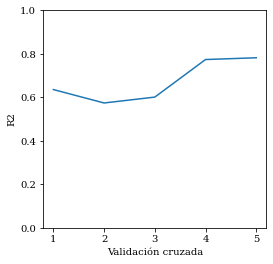

In [66]:
results = cross_val_score(lr, X_train, y_train, cv=kfold, scoring='r2')
print(results)
print(np.sqrt(results))
print(results.mean())

# Figura de score en la validación cruzada

plt.figure(figsize=(4,4))
plt.plot(np.arange(1,len(results)+1), results)
plt.xlabel('Validación cruzada')
plt.ylabel('R2')
plt.ylim([0,1])
# plt.savefig(ruta_imagenes+'Validacion_cruzada_lr_clasif.png', bbox_inches='tight', dpi=150)

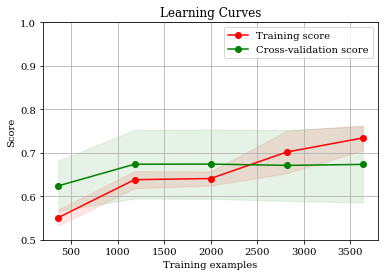

In [68]:
from sklearn.model_selection import learning_curve

lc = learning_curve(lr,X_train, y_train,cv=kfold)
train_sizes, train_scores, test_scores = lc[0], lc[1], lc[2]
lc

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curves")    
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.ylim([0.5,1])
plt.legend(loc="best");
# plt.savefig(ruta_imagenes+'Curva_aprendizaje_clasif_max.png', bbox_inches='tight', dpi=150)

In [31]:
model=lr.fit(X_train,y_train)


y_test_pred=model.predict(X_test)

In [16]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [70]:
import statsmodels.api as sm
lm=sm.OLS(y_train, X_train).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Caudal   R-squared (uncentered):                   0.735
Model:                            OLS   Adj. R-squared (uncentered):              0.734
Method:                 Least Squares   F-statistic:                              1573.
Date:                Tue, 22 Nov 2022   Prob (F-statistic):                        0.00
Time:                        15:33:35   Log-Likelihood:                         -3444.2
No. Observations:                4547   AIC:                                      6904.
Df Residuals:                    4539   BIC:                                      6956.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------